# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Etapa 1. Inicialización](#inicializacion) 
* [Etapa 2. Cargar los datos](#cargar)
* [Etapa 3. Preparar los datos](#preparar)
    * [Calls](#calls)
      * [Conclusiones y siguientes pasos](#conclu_calls)
      * [Corregir datos](#corregir_calls)
    * [Clients](#clients)
      * [Corregir datos](#corregir_clients)
* [Etapa 4. Análisis exploratorio de datos](#analisis)
* [Etapa 5. Estudiar el comportamiento de los operadores](#estudiar)
* [Etapa 6. Identificar operadores ineficientes ](#identificar)
    * [Conclusiones](conclu_ineficientes)
* [Probar hipótesis estadísticas](#hipotesis)
* [Conclusión general](#general)
* [Enlaces presentación, dashboard y documentación](#enlaces)

# Identificar operadores ineficaces <a id='intro'></a>

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

Se requiere identificar a los operadores ineficientes que trabajan en el servicio de telefonía CallMeMaybe porque están desarrollando una nueva función que brindará dicha información a los supervisores y supervisoras de la compañía y así mejorar el servicio a los clientes, estos clientes son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, realizar llamadas salientes a través de sus operadores o internas para comunicarse entre ellos. 
Se van a tratar los valores ausentes, verificar duplicados, corregir los tipos de datos, hacer comprobaciones con los datos limpios, estudiar comportamientos de los operadores, probar algunas hipótesis para luego determinar las conclusiones del estudio.

## Inicialización <a id='inicializacion'></a>

In [1]:
# Cargar todas las librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

## Cargar los datos <a id='cargar'></a>

In [2]:
# Carga del archivo de datos DataFrame

try:
    calls= pd.read_csv(r"C:\Users\yanim\Downloads\telecom_dataset_us.csv")
    clients= pd.read_csv(r"C:\Users\yanim\Downloads\telecom_clients_us.csv")
except:
    calls= pd.read_csv("/datasets/telecom_dataset_us.csv")
    clients= pd.read_csv("/datasets/telecom_clients_us.csv")

## Preparar los datos <a id='preparar'></a>

### Calls <a id='calls'></a>

In [3]:
# información general/resumen sobre el DataFrame Calls
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [4]:
# Muestra de los datos de calls

calls.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [5]:
# estudiar valores ausentes
calls.isnull().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [6]:
# Comprobar si hay duplicados

print(calls.duplicated().sum())
duplicated_calls= calls[calls.duplicated()]

4900


In [7]:
# Verificar máximo y mínimo de date

print(calls['date'].min())
print(calls['date'].max())

2019-08-02 00:00:00+03:00
2019-11-28 00:00:00+03:00


In [8]:
# Verificar distribución de direction

calls['direction'].value_counts()

out    31917
in     21985
Name: direction, dtype: int64

In [9]:
# Verificar distribución de internal

calls['internal'].value_counts()

False    47621
True      6164
Name: internal, dtype: int64

In [10]:
# Verificar distribución de is_missed_call

calls['is_missed_call'].value_counts()

False    30334
True     23568
Name: is_missed_call, dtype: int64

El dataset **calls** contiene los siguientes campos:

- `user_id` — ID de la cuenta de cliente.
- `date` — fecha en la que se recuperaron las estadísticas.        
- `direction`  — "dirección" de llamada (out para saliente, in para entrante).  
- `internal` — si la llamada fue interna (entre los operadores de un cliente o clienta).     
- `operator_id` — identificador del operador.
- `is_missed_call` — si fue una llamada perdida.  
- `calls_count` — número de llamadas.  
- `call_duration`  — duración de la llamada (sin incluir el tiempo de espera).  
- `total_call_duration` — duración de la llamada (incluido el tiempo de espera).


- Tenemos un conjunto de datos conformado por 9 columnas y 53902 filas.
- Se necesita ajustar el tipo de dato de las columnas date y operador_id.
- Se encontraron valores ausentes en las columnas operador_id y internal.
- A priori se encontraron 4900 filas duplicadas.
- Se determinó que el conjunto de datos comprende el período desde 2019-08-02 hasta el 2019-11-28.
- La columna direction está conformada por los valores out 31917 registros y in 21985.
- La columna internal está conformada por valores booleanos False contiene 47621 registros y True 6164.
- La columna is_missed_call está conformada por valores booleanos False 30334 registros y True 23568.


#### Conclusiones y siguientes pasos <a id='conclu_calls'></a>

- Se procede a ajustar los tipos de datos de las columnas date y operador_id, verificar los valores duplicados para determinar que hacer con ellos, los valores ausentes de la columna operator_id se van a eliminar ya que no hay manera de saber a que operador pertenece la llamada y reemplazar por algún otro valor podría afectar el estudio, mientras que los valores ausentes de la columna internal no se visualiza ningún patrón así que serán reemplazados por no 'disponible'.

#### Corregir datos<a id='corregir_calls'></a>

In [11]:
# verificar duplicados

duplicated_data= calls[calls.duplicated(keep=False)]
duplicated_data = duplicated_calls.sort_values(by=['user_id', 'date', 'direction', 'internal','operator_id','is_missed_call','calls_count','call_duration','total_call_duration'])
duplicated_data.head(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
28,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34
45,166377,2019-08-14 00:00:00+03:00,in,False,NaN,True,1,0,3
44,166377,2019-08-14 00:00:00+03:00,out,False,880026.0,False,10,1567,1654
51,166377,2019-08-15 00:00:00+03:00,out,False,880026.0,False,11,1413,1473
62,166377,2019-08-19 00:00:00+03:00,out,False,880026.0,False,14,1519,1598
78,166377,2019-08-22 00:00:00+03:00,out,False,880026.0,True,6,0,55
87,166377,2019-08-23 00:00:00+03:00,in,False,880026.0,False,1,45,52
86,166377,2019-08-23 00:00:00+03:00,out,False,880026.0,False,43,3435,3654
100,166377,2019-08-27 00:00:00+03:00,out,False,880028.0,False,20,2784,2979


- Se comprueba que en realidad los datos no son duplicados ya que los valores de la columna date no son iguales, por lo que no es necesario eliminarlos.

In [12]:
# Reemplazar valores ausentes en 'internal'
calls.fillna({'internal': 'No disponible'}, inplace=True)


In [13]:
# Eliminar valores ausentes en la columna operador_id

calls= calls.dropna()

In [14]:
# verificar los valores ausentes
calls.isnull().sum()

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64

In [15]:
# cambiar tipos de datos 
calls['date'] = pd.to_datetime(calls['date'])
calls['operator_id'] = calls['operator_id'].astype('int')

In [16]:
# información general/resumen sobre el DataFrame Calls
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45730 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              45730 non-null  int64                                
 1   date                 45730 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            45730 non-null  object                               
 3   internal             45730 non-null  object                               
 4   operator_id          45730 non-null  int64                                
 5   is_missed_call       45730 non-null  bool                                 
 6   calls_count          45730 non-null  int64                                
 7   call_duration        45730 non-null  int64                                
 8   total_call_duration  45730 non-null  int64                                
dtypes: bool

In [17]:
# Muestra de los datos de calls

calls.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25
5,166377,2019-08-05 00:00:00+03:00,out,False,880020,False,2,3,29


In [18]:
# Verificar si hay llamadas perdidas con duración diferente de 0 

verificar_perdidas = calls[(calls['is_missed_call'] == True) & (calls['call_duration'] != 0)]

if not verificar_perdidas.empty:
    print('Existen registros de llamadas perdidas con duración diferente de 0:')
    print(verificar_perdidas.count())
else:
    print('No hay registros de llamadas perdidas con duración diferente de 0.')


Existen registros de llamadas perdidas con duración diferente de 0:
user_id                325
date                   325
direction              325
internal               325
operator_id            325
is_missed_call         325
calls_count            325
call_duration          325
total_call_duration    325
dtype: int64


In [19]:
verificar_perdidas.head(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1606,166405,2019-11-19 00:00:00+03:00,in,False,939478,True,1,165,173
1635,166405,2019-11-21 00:00:00+03:00,in,False,882686,True,1,1,5
1657,166405,2019-11-22 00:00:00+03:00,in,False,882686,True,1,1,5
2283,166407,2019-09-23 00:00:00+03:00,in,False,888534,True,1,133,156
2869,166482,2019-11-05 00:00:00+03:00,in,False,934074,True,1,1,15
2956,166485,2019-09-09 00:00:00+03:00,in,False,887276,True,1,31,44
3376,166485,2019-10-31 00:00:00+03:00,in,False,887276,True,1,79,123
3975,166503,2019-08-12 00:00:00+03:00,in,True,884408,True,1,38,69
4073,166503,2019-09-25 00:00:00+03:00,in,False,906680,True,1,53,70
4080,166503,2019-09-25 00:00:00+03:00,in,False,884408,True,2,47,84


In [20]:
# Eliminar las llamadas perdidas con duración diferente de 0, utilizando los índice de verificar_perdidas

calls = calls.drop(verificar_perdidas.index)

In [21]:
# Verificar filas donde total_call_duration es menor call_duration

verificar_duracion = calls[calls['total_call_duration'] < calls['call_duration']]

if not verificar_duracion.empty:
    print('Existen registros donde total_call_duration es menor a call_duration:')
    print(df_invalid_duration.count())
else:
    print('Todos los registros cumplen la condición de total_call_duration > call_duration.')


Todos los registros cumplen la condición de total_call_duration > call_duration.


In [22]:
# Información de la tabla actualizada

calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45405 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              45405 non-null  int64                                
 1   date                 45405 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            45405 non-null  object                               
 3   internal             45405 non-null  object                               
 4   operator_id          45405 non-null  int64                                
 5   is_missed_call       45405 non-null  bool                                 
 6   calls_count          45405 non-null  int64                                
 7   call_duration        45405 non-null  int64                                
 8   total_call_duration  45405 non-null  int64                                
dtypes: bool

### Clients <a id='clients'></a>

In [23]:
# información general/resumen sobre el DataFrame Clients
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [24]:
# Muestra de los datos de clients
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [25]:
# Comprobar si hay duplicados

print(clients.duplicated().sum())
duplicated_clients= clients[clients.duplicated()]

0


In [26]:
# Verificar distribución de tariff_plan

clients['tariff_plan'].value_counts()

C    395
B    261
A     76
Name: tariff_plan, dtype: int64

In [27]:
# Verificar máximo y mínimo de date_start

print(clients['date_start'].min())
print(clients['date_start'].max())

2019-08-01
2019-10-31


El dataset **clients** contiene los siguientes campos:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

Tenemos un conjunto de datos conformado por 3 columnas y 732 filas.
Se necesita ajustar el tipo de dato de la columna date_start.
No se encontraron valores ausentes.
No se encontraron filas duplicadas.
Se determinó que el conjunto de datos comprende a los clientes que se registraron en el período desde 2019-08-01 hasta el 2019-10-31.
La columna tariff_plan está conformada por tres tipos de planes el A con 76 clientes, el B con 261 clientes y C con 395 clientes.

#### Corregir datos<a id='corregir_clients'></a>

In [28]:
# Ajustar tipo de dato
clients['date_start'] = pd.to_datetime(clients['date_start'])

In [29]:
# información general/resumen sobre el DataFrame Clients
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


In [30]:
# Muestra de los datos de clients
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


## Análisis Exploratorio de los Datos <a id='analisis'></a>

In [31]:
# Estudiar los estadísticos que describen los datos

calls['call_duration'].describe()


count     45405.000000
mean       1016.430679
std        4028.152284
min           0.000000
25%           0.000000
50%         108.000000
75%         783.000000
max      144395.000000
Name: call_duration, dtype: float64

- Con la descripción de los datos se determina que la columna tiene 45405 observaciones, la media o promedio es de 1016.430679, la desviación estándar nos dice que los datos se encuentran dispersos ya que el valor es de 4028.152284, el valor mínimo es 0 mientras que el máximo 144395.000000 es bastante más alto que el mínimo, la mediana que indica el valor que está en el centro de los datos cuando están ordenados es de 108.000000.

In [32]:
# Calcular el tiempo de espera para cada llamada

calls['tiempo_espera']= calls['total_call_duration']- calls['call_duration']
calls.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tiempo_espera
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18,8
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,25
5,166377,2019-08-05 00:00:00+03:00,out,False,880020,False,2,3,29,26


In [33]:
# Estudiar los estadísticos que describen los datos

calls['tiempo_espera'].describe()

count    45405.000000
mean       314.439137
std       1178.124502
min          0.000000
25%         19.000000
50%         61.000000
75%        222.000000
max      46474.000000
Name: tiempo_espera, dtype: float64

- Con la descripción de los datos se determina que la columna tiene 45405 observaciones, la media o promedio es de 314.439137, la desviación estándar nos dice que los datos se encuentran dispersos ya que el valor es de 1178.124502, el valor mínimo es 0 mientras que el máximo 46474.000000 es bastante más alto que el mínimo, la mediana que indica el valor que está en el centro de los datos cuando están ordenados es de 61.000000.

In [34]:
# cantidad de llamadas llamadas internas y externas

calls['internal'].value_counts()

False            39575
True              5771
No disponible       59
Name: internal, dtype: int64

In [35]:
# Porcentaje de llamadas internas y externas
calls['internal'].value_counts(normalize=True)*100

False            87.160004
True             12.710054
No disponible     0.129942
Name: internal, dtype: float64

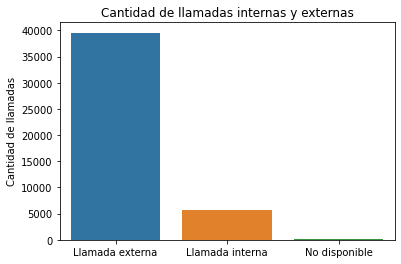

In [36]:
# Mostrar la cantidad de llamadas internas y externas

calls_tipos = calls['internal'].value_counts()
calls_tipos = calls_tipos.rename({False: 'Llamada externa', True: 'Llamada interna'})

sns.barplot(x=calls_tipos.index, y=calls_tipos.values)
plt.ylabel('Cantidad de llamadas')
plt.title('Cantidad de llamadas internas y externas')
plt.show()

- La cantidad de llamadas externas representan la mayoría de las llamadas con 39575 que representa el 87.160004 % de los datos, mientras que las llamadas internas solo 5771 el 12.710054 %, luego tenemos un muy pequeño grupo de llamadas de las que no tenemos información a cual de los grupos pertenece que solo representa el 0.129942 %. 

In [37]:
# cantidad de llamadas salientes y entrantes

calls['direction'].value_counts()

out    31693
in     13712
Name: direction, dtype: int64

In [38]:
# Porcentaje de llamadas salientes y entrantes
calls['direction'].value_counts(normalize=True)*100

out    69.800683
in     30.199317
Name: direction, dtype: float64

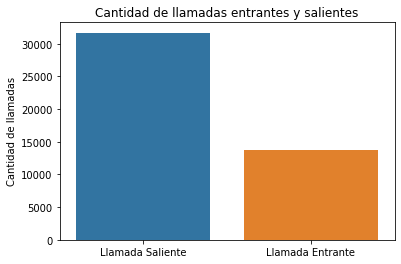

In [39]:
# Mostrar la cantidad  de  llamadas salientes y entrantes

calls_tipos_2 = calls['direction'].value_counts()
calls_tipos_2 = calls_tipos_2.rename({'in': 'Llamada Entrante', 'out': 'Llamada Saliente'})

sns.barplot(x=calls_tipos_2.index, y=calls_tipos_2.values)
plt.ylabel('Cantidad de llamadas')
plt.title('Cantidad de llamadas entrantes y salientes')
plt.show()


- La cantidad de llamadas salientes representan la mayoría de las llamadas con 31693 que representa el 69.800683 % , mientras que las llamadas entrantes se registran 13712 el 30.199317 %.

## Estudiar el comportamiento de los operadores <a id='estudiar'></a>

 Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

In [40]:
# Filtrar los datos con la información de las llamadas entrantes y salientes por separado

llamadas_entrantes = calls[calls['direction'] == 'in']
llamadas_salientes = calls[calls['direction'] == 'out']

In [41]:
# Calcular la cantidad de llamadas salientes por operador 

llamadas_salientes_count = llamadas_salientes.groupby('operator_id')['calls_count'].sum()

In [42]:
llamadas_salientes_count.describe()

count      882.000000
mean       758.786848
std       3437.152007
min          1.000000
25%         13.000000
50%         99.000000
75%        656.500000
max      64897.000000
Name: calls_count, dtype: float64

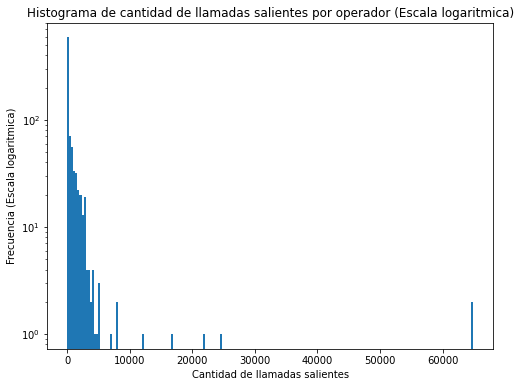

In [43]:
# Distribución de la cantidad de llamadas salientes por operador

plt.figure(figsize=(8, 6))
plt.hist(llamadas_salientes_count, bins=200, log=True)
plt.xlabel('Cantidad de llamadas salientes')
plt.ylabel('Frecuencia (Escala logaritmica)')
plt.title('Histograma de cantidad de llamadas salientes por operador (Escala logaritmica)')
plt.show()

Se estudió la cantidad de llamadas salientes por operador ya que un número reducido de llamdas salientes es signo de ineficiencia y se puede observar que los valores se encuentran dispersos y esto se demuestra con una desviación estándar muy alta 3437.152007, los valores atípicos llegas hasta más de 60000 llamadas por operador.

In [44]:
# Calcular cantidad de llamadas entrantes perdidas por operador

llamadas_perdidas_entrantes_count = llamadas_entrantes.groupby('operator_id')['is_missed_call'].sum()


In [45]:
llamadas_perdidas_entrantes_count

operator_id
879896    0
879898    0
880020    0
880022    0
880026    0
         ..
971102    0
971354    0
972412    0
972460    0
973286    0
Name: is_missed_call, Length: 753, dtype: int64

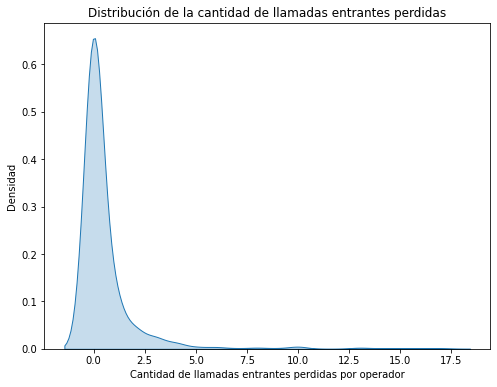

In [46]:
# Distribución de la cantidad promedio de llamadas entrantes perdidas por operador
plt.figure(figsize=(8, 6))
sns.kdeplot(llamadas_perdidas_entrantes_count.values, shade=True)
plt.xlabel('Cantidad de llamadas entrantes perdidas por operador')
plt.ylabel('Densidad')
plt.title('Distribución de la cantidad de llamadas entrantes perdidas')
plt.show()

Se estudió la cantidad de llamadas entrantes perdidas por operador ya que es una señal de ineficiencia y se pueden observar algunos valores atípicos que van desde el 5 hasta 17.5, la mayoría de los datos se encuentran ubicados en 0 llamadas perdidas por operador.

In [47]:
# Calcular el tiempo de espera promedio de las llamadas entrantes por operador 

tiempo_espera = llamadas_entrantes.groupby('operator_id')['tiempo_espera'].mean()

In [48]:
tiempo_espera.describe()

count     753.000000
mean       59.057029
std        98.018506
min         1.000000
25%        17.636364
50%        31.071429
75%        59.093333
max      1039.540541
Name: tiempo_espera, dtype: float64

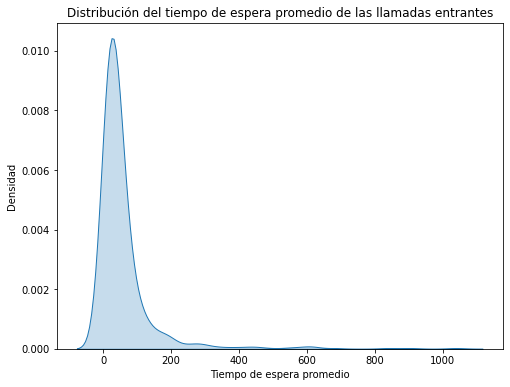

In [49]:
plt.figure(figsize=(8, 6))
sns.kdeplot(tiempo_espera.values, shade=True)
plt.xlabel('Tiempo de espera promedio')
plt.ylabel('Densidad')
plt.title('Distribución del tiempo de espera promedio de las llamadas entrantes')
plt.show()

Se estudió el tiempo de espera promedio por operador ya que es una señal de ineficiencia y se puede observar que los valores se encuentran dispersos y esto se demuestra con una desviación estándar alta 98.018506, el valor mínimo es 1 y el máximo 1039.540541, también vemos que la media es de 59.057029 donde se encuentra el punto más alto de la curva.

In [50]:
# Dataframe con el comportamiento de los usuarios

In [51]:
tiempo_espera= tiempo_espera.to_frame().reset_index()
llamadas_perdidas_entrantes_count= llamadas_perdidas_entrantes_count.to_frame().reset_index()
llamadas_salientes_count= llamadas_salientes_count.to_frame().reset_index()

# Unir los 3 dataFrames
operadores = llamadas_perdidas_entrantes_count.merge(tiempo_espera, on='operator_id', how='outer').merge(llamadas_salientes_count, on='operator_id', how='outer')


In [52]:
# Reenombrar columnas
operadores.columns= ['id_operador','llamadas_perdidas','tiempo_espera','llamadas_salientes']

In [53]:
# Información dataframe resultante operadores
operadores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 1091
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_operador         1092 non-null   int64  
 1   llamadas_perdidas   753 non-null    float64
 2   tiempo_espera       753 non-null    float64
 3   llamadas_salientes  882 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 42.7 KB


In [54]:
# Muestra de datos DataFrame resultante operadores
operadores.head(10)

,id_operador,llamadas_perdidas,tiempo_espera,llamadas_salientes
0,879896,0.0,26.913043,1071.0
1,879898,0.0,28.203125,7856.0
2,880020,0.0,7.250000,46.0
3,880022,0.0,14.000000,211.0
4,880026,0.0,7.894737,2414.0
5,880028,0.0,8.844444,2836.0
6,882476,0.0,31.666667,NaN
7,882478,0.0,38.000000,1.0
8,882680,3.0,37.108696,NaN
9,882684,4.0,191.730769,721.0


In [55]:
# Reemplazar los valores nulos con ceros 
operadores.fillna({'llamadas_perdidas':0, 'tiempo_espera': 0, 'llamadas_salientes': 0}, inplace=True)
operadores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 1091
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_operador         1092 non-null   int64  
 1   llamadas_perdidas   1092 non-null   float64
 2   tiempo_espera       1092 non-null   float64
 3   llamadas_salientes  1092 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 42.7 KB


In [56]:
# Muestra de datos 

operadores.head(10)

,id_operador,llamadas_perdidas,tiempo_espera,llamadas_salientes
0,879896,0.0,26.913043,1071.0
1,879898,0.0,28.203125,7856.0
2,880020,0.0,7.250000,46.0
3,880022,0.0,14.000000,211.0
4,880026,0.0,7.894737,2414.0
5,880028,0.0,8.844444,2836.0
6,882476,0.0,31.666667,0.0
7,882478,0.0,38.000000,1.0
8,882680,3.0,37.108696,0.0
9,882684,4.0,191.730769,721.0


## Identificar operadores ineficientes <a id='identificar'></a>

In [57]:
# Cálculo de percentiles 90, 95 y 99 para las llamadas perdidas

print(np.percentile(operadores['llamadas_perdidas'], [90,95,99]))

[1.   2.   8.09]


No mas del 5% de los operadores tiene más de 2 llamadas y no más del 1% de los operadores tiene más de 8 llamadas perdidas.

In [58]:
# Calculo de percentiles 90, 95 y 99 para el tiempo_espera

print(np.percentile(operadores['tiempo_espera'], [90,95,99]))

[ 85.05164835 152.15662736 452.36714286]


No mas del 5% de los operadores tiene un tiempo de espera superior a 152.15662736 y no más del 1% de los operadores tiene un tiempo de espera superior a 452.36714286

In [59]:
# Calculo de percentiles 10,25,50 para las llamadas salientes

print(np.percentile(operadores['llamadas_salientes'], [10,25,50]))

[ 0.   2.  36.5]


In [60]:
operadores['llamadas_salientes'].value_counts()

0.0       210
1.0        55
2.0        30
3.0        23
4.0        17
         ... 
492.0       1
195.0       1
187.0       1
1346.0      1
436.0       1
Name: llamadas_salientes, Length: 466, dtype: int64

- Menos del 10% de los operadores no realizaron ninguna llamada salientes.

###  Conclusiones <a id='conclu_ineficientes'></a>

- Luego de calcular los percentiles podemos identificar como operadores ineficientes a aquellos que tienen más de 8 llamadas entrantes perdidas, el tiempo de espera es mayor a 452.36714286] y no realizaron ninguna llamada salientes. 

In [61]:
# definir constantes

tiempo_espera= np.percentile(operadores['tiempo_espera'],99)
llamadas_salientes = np.percentile(operadores['llamadas_perdidas'], 10)
llamadas_perdidas= np.percentile(operadores['llamadas_perdidas'], 99)

In [62]:
# Filtrar operadores ineficientes

operadores_ineficientes_1 = operadores[operadores['tiempo_espera'] > tiempo_espera]['id_operador']
operadores_ineficientes_2 = operadores[operadores['llamadas_salientes'] <= llamadas_salientes]['id_operador']
operadores_ineficientes_3 = operadores[operadores['llamadas_perdidas'] >  llamadas_perdidas]['id_operador']


In [63]:
operadores_ineficientes = pd.concat([operadores_ineficientes_1, operadores_ineficientes_2, operadores_ineficientes_3], axis = 0).drop_duplicates().sort_values()
print(operadores_ineficientes.shape) 

(230,)


In [64]:
operadores_ineficientes

6      882476
8      882680
15     884294
19     884524
21     885876
        ...  
738    968520
747    971100
748    971102
749    971354
752    973286
Name: id_operador, Length: 230, dtype: int64

In [65]:
operadores_ineficientes = operadores.merge(operadores_ineficientes, on='id_operador')
operadores_ineficientes

,id_operador,llamadas_perdidas,tiempo_espera,llamadas_salientes
0,882476,0.0,31.666667,0.0
1,882680,3.0,37.108696,0.0
2,884294,0.0,6.000000,0.0
3,884524,0.0,10.333333,0.0
4,885876,15.0,107.494845,64897.0
...,...,...,...,...
225,968520,0.0,5.000000,0.0
226,971100,0.0,13.000000,0.0
227,971102,0.0,274.000000,0.0
228,971354,0.0,42.000000,0.0


- Se identificaron 230 operadores ineficaces, los cuales cumplen alguna de estas condiciones: tiene una gran cantidad de llamadas entrantes perdidas, un tiempo de espera prolongado para las llamadas entrantes o un número reducido de llamadas salientes.

## Probar las hipótesis estadísticas. <a id='hipotesis'></a>

**Hipótesis 1**

- H0: No hay correlación significativa entre la cantidad de llamadas perdidas y el número de llamadas salientes.
- H1: Existe una correlación significativa entre la cantidad de llamdas perdidas y el número de llamadas salientes.
- alpha = 0.05 nivel crítico de significación estadística


In [66]:
llamadas_perdidas_hip = operadores['llamadas_perdidas']
llamadas_salientes_hip = operadores['llamadas_salientes']

alpha = 0.05

corr_coef, p_value = stats.pearsonr(operadores['llamadas_perdidas'], operadores['llamadas_salientes'])

print('p-value:', p_value)

if p_value < alpha:
    
    print('Rechazamos la hipótesis nula')
else:
    print('No rechazamos la hipótesis nula') 

p-value: 3.9106404044617064e-46
Rechazamos la hipótesis nula


Los datos proporcionan evidencia suficiente, dado el nivel de significación que seleccionamos, que hay motivos suficientes para rechazar la hipótesis nula. Por lo tanto, podemos concluir que existe una correlación significativa entre la cantidad de llamadas perdidas y el número de llamadas salientes

**Hipótesis 2**

- H0: No hay correlación significativa entre el tiempo de espera y las llamadas salientes.
- H1: Existe una correlación significativa entre el tiempo de espera y las llamadas salientes.
- alpha = 0.05 nivel crítico de significación estadística

In [67]:
tiempo_espera_hip = operadores['tiempo_espera']
llamadas_salientes_hip = operadores['llamadas_salientes']

alpha = 0.05

corr_coef, p_value = stats.pearsonr(tiempo_espera_hip, llamadas_salientes_hip)

print('p-value:', p_value)

if p_value < alpha:
    
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula") 

p-value: 0.18777251265494818
No rechazamos la hipótesis nula


Los datos proporcionan evidencia suficiente, dado el nivel de significación que seleccionamos que no hay motivos suficientes para rechazar la hipótesis nula. Por lo tanto, podemos concluir que existe una correlación significativa entre el tiempo de espera y el número de llamadas salientes.

**Hipótesis 3**

- H0: No hay correlación significativa entre el tiempo de espera y las llamadas perdidas.
- H1: Existe una correlación significativa entre el tiempo de espera y las llamadas perdidas.
- alpha = 0.05 nivel crítico de significación estadística

In [68]:
llamadas_perdidas_hip = operadores['llamadas_perdidas']
tiempo_espera_hip = operadores['tiempo_espera']

alpha = 0.05

corr_coef, p_value = stats.pearsonr(tiempo_espera_hip, llamadas_perdidas_hip)

print('p-value:', p_value)

if p_value < alpha:
    
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula") 

p-value: 3.284143095992844e-38
Rechazamos la hipótesis nula


Los datos proporcionan evidencia suficiente, dado el nivel de significación que seleccionamos, que hay motivos suficientes para rechazar la hipótesis nula. Por lo tanto, podemos concluir que existe una correlación significativa entre el tiempo de espera y las llamadas perdidas

## Conclusión general <a id='general'></a>

El estudio se basó en el analisis de 2 Datasets que permitieron obtener información y identificar los operadores ineficientes según los parámetros establecidos por el servicio de telefonía virtual CallMeMaybe: gran cantidad de llamadas entrantes perdidas (internas y externas), tiempo de espera prolongado para las llamadas entrantes y número reducido de llamadas salientes.

- El datasets calls está conformado por 9 columnas y 53902 filas, se ajustó el tipo de dato de las columnas date y operador_id,
se determinó que el conjunto de datos comprende el período desde 2019-08-02 hasta el 2019-11-28, La columna direction está conformada por los valores out(llamadas salientes 31917 registros y in(llamadas entrantes) 21985, la columna internal está conformada por valores booleanos False(es llamada externa) contiene 47621 registros y True(es llamada interna) 6164, la columna is_missed_call está conformada por valores booleanos False(no es llamada perdida) 30334 registros y True(es llamada perdida 23568, se comprobó que no tenía valores duplicados y los valores ausentes de la columna operator_id se reemplazaron por el valor 0 mientras que los valores ausentes de la columna internal no se visualiza ningún patrón así que serán reemplazados por no 'disponible'.

- El dataset clients conformado por 3 columnas y 732 filas. Se ajustó el tipo de dato de la columna date_start. No se encontraron valores ausentes. No se encontraron filas duplicadas. Se determinó que el conjunto de datos comprende a los clientes que se registraron en el período desde 2019-08-01 hasta el 2019-10-31. La columna tariff_plan está conformada por tres tipos de planes el A con 76 clientes, el B con 261 clientes y C con 395 clientes.

Se realizó el análisis exploratorio de los datos y se obtuvieron los siguientes resultados:

- Con la descripción de la duración de la llamadas se determina que la columna tiene 45405 observaciones, la media o promedio es de 1016.430679, la desviación estándar nos dice que los datos se encuentran dispersos ya que el valor es de 4028.152284, el valor mínimo es 0 mientras que el máximo 144395.000000 es bastante más alto que el mínimo, la mediana que indica el valor que está en el centro de los datos cuando están ordenados es de 108.000000.

- Con la descripción del tiempo de espera se determina que la columna tiene 45405 observaciones, la media o promedio es de 314.439137, la desviación estándar nos dice que los datos se encuentran dispersos ya que el valor es de 1178.124502, el valor mínimo es 0 mientras que el máximo 46474.000000 es bastante más alto que el mínimo, la mediana que indica el valor que está en el centro de los datos cuando están ordenados es de 61.000000.

- La cantidad de llamadas externas representan la mayoría de las llamadas con 39575 que representa el 87.160004 % de los datos, mientras que las llamadas internas solo 5771 el 12.710054 %, luego tenemos un muy pequeño grupo de llamadas de las que no tenemos información a cual de los grupos pertenece que solo representa el 0.129942 %. 

- La cantidad de llamadas salientes representan la mayoría de las llamadas con 31693 que representa el 69.800683 % , mientras que las llamadas entrantes se registran 13712 el 30.199317 %.

Se estudió el comportamiento de los operadores y se obtuvieron los siguientes resultados:

- Se estudió la cantidad de llamadas salientes por operador ya que un número reducido de llamdas salientes es signo de ineficiencia y se puede observar que los valores se encuentran dispersos y esto se demuestra con una desviación estándar muy alta 3437.152007, los valores atípicos llegas hasta más de 60000 llamadas por operador.

- Se estudió la cantidad de llamadas entrantes perdidas por operador ya que es una señal de ineficiencia y se pueden observar algunos valores atípicos que van desde el 5 hasta 17.5, la mayoría de los datos se encuentran ubicados en 0 llamadas perdidas por operador.

- Se estudió el tiempo de espera promedio por operador ya que es una señal de ineficiencia y se puede observar que los valores se encuentran dispersos y esto se demuestra con una desviación estándar alta 98.018506, el valor mínimo es 1 y el máximo 1039.540541, también vemos que la media es de 59.057029 donde se encuentra el punto más alto de la curva.

Para identificar los operadores ineficientes se utilizó la función percentile() de la librería numpy y se obtuvieron los siguientes resultados:

- Para calcular los operadores ineficientes dependiendo del número de llamadas perdidas se calcularon los percentiles 90,95 y 99 y se determinó que no mas del 5% de los operadores tiene más de 2 llamadas y no más del 1% de los operadores tiene más de 8 llamadas perdidas.

- Para calcular los operadores ineficientes dependiendo del tiempo de espera en las llamadas entrantes se calcularon los percentiles 90,95 y 99 y se determinó que No mas del 5% de los operadores tiene un tiempo de espera superior a 152.15662736 y no más del 1% de los operadores tiene un tiempo de espera superior a 452.36714286.

- Para calcular los operadores ineficientes dependiendo de la cantidad de llamadas salientes se calcularon los percentiles 10, 25 y 50 y se determinó que menos del 10% de los operadores no realizaron ninguna llamada salientes.

Luego de calcular los percentiles podemos identificar como operadores ineficientes a aquellos que tienen más de 8 llamadas entrantes perdidas, el tiempo de espera es mayor a 452.36714286 y no realizaron ninguna llamada salientes y se identificaron 230 operadores ineficaces, los cuales cumplen alguna de estas condiciones: tiene una gran cantidad de llamadas entrantes perdidas, un tiempo de espera prolongado para las llamadas entrantes o un número reducido de llamadas salientes.

Se formularon las siguientes hipótesis estadísticas:

**Hipótesis 1**

   H0: No hay correlación significativa entre la cantidad de llamadas perdidas y el número de llamadas salientes.

   H1: Existe una correlación significativa entre la cantidad de llamdas perdidas y el número de llamadas salientes.
   
   alpha = 0.05 nivel crítico de significación estadística.
   
Se realizó la prueba del coeficiente de correlación de Pearson con el método scipy.stats.pearsonr(array1, array2) para probar la correlación entre dos conjuntos de datos.

Se concluyó lo siguiente:

Los datos proporcionan evidencia suficiente, dado el nivel de significación que seleccionamos, que hay motivos suficientes para rechazar la hipótesis nula. Por lo tanto, podemos concluir que existe una correlación significativa entre la cantidad de llamadas perdidas y el número de llamadas salientes.

**Hipótesis 2**

   H0: No hay correlación significativa entre el tiempo de espera y las llamadas salientes.

   H1: Existe una correlación significativa entre el tiempo de espera y las llamadas salientes.
   
   alpha = 0.05 nivel crítico de significación estadística.

Se realizó la prueba del coeficiente de correlación de Pearson con el método scipy.stats.pearsonr(array1, array2) para probar la correlación entre dos conjuntos de datos.

Se concluyó lo siguiente:

Los datos proporcionan evidencia suficiente, dado el nivel de significación que seleccionamos que no hay motivos suficientes para rechazar la hipótesis nula. Por lo tanto, podemos concluir que existe una correlación significativa entre el tiempo de espera y el número de llamadas salientes.

**Hipótesis 3**

   H0: No hay correlación significativa entre el tiempo de espera y las llamadas perdidas.

   H1: Existe una correlación significativa entre el tiempo de espera y las llamadas perdidas.
   
   alpha = 0.05 nivel crítico de significación estadística.

Se realizó la prueba del coeficiente de correlación de Pearson con el método scipy.stats.pearsonr(array1, array2) para probar la correlación entre dos conjuntos de datos.

Se concluyó lo siguiente:

Los datos proporcionan evidencia suficiente, dado el nivel de significación que seleccionamos, que hay motivos suficientes para rechazar la hipótesis nula. Por lo tanto, podemos concluir que existe una correlación significativa entre el tiempo de espera y las llamadas perdidas

# Enlaces presentación, dashboard y documentación <a id='enlaces'></a>

Enlace de presentación: https://drive.google.com/file/d/13MEH061akeP4hN6lWq8DjydzwchVKaSl/view?usp=drive_link
    
Enlace listado documentación utilizada: https://drive.google.com/file/d/1iaRK0qkjLAq7QBJtmwieajYFDmGGqlda/view?usp=drive_link

Enlace Dashboard: https://public.tableau.com/app/profile/yanimir.salazar/viz/DuracinyCantidaddellamadas/Duracinycantidaddellamdas?publish=yes